Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana
---



In [1]:
#Visu datu ielasīšanai, priekšapstrādei un vizualizācijai nepieciešamo bibliotēku pievienošana
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Tiek nolasīts datu kopas fails
datu_kopa = pd.read_csv('dataset/filtered_heart.csv')
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes) 

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


### Datu tipu salāgošana 

In [7]:
#Tā kā kategoriskiem atribūtiem tiek norādīts tips "object", tas tiek mainīts uz "category"
datu_kopa["Sex"] = datu_kopa["Sex"].astype('category')
datu_kopa["ChestPainType"] = datu_kopa["ChestPainType"].astype('category')
datu_kopa["RestingECG"] = datu_kopa["RestingECG"].astype('category')
datu_kopa["ExerciseAngina"] = datu_kopa["ExerciseAngina"].astype('category')
datu_kopa["ST_Slope"] = datu_kopa["ST_Slope"].astype('category')
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up           

In [8]:
#Tiek izveidotas jaunas kolonas kategoriskajiem atribūtiem un to vērtības tiek pārvērstas par skaitliskām vērtībām
datu_kopa["Sex_cat"] = datu_kopa["Sex"].cat.codes
datu_kopa["ChestPainType_cat"] = datu_kopa["ChestPainType"].cat.codes
datu_kopa["RestingECG_cat"] = datu_kopa["RestingECG"].cat.codes
datu_kopa["ExerciseAngina_cat"] = datu_kopa["ExerciseAngina"].cat.codes
datu_kopa["ST_Slope_cat"] = datu_kopa["ST_Slope"].cat.codes
#Tiek atspoguļoti datu kopas kolonu datu tipi
print(datu_kopa.dtypes)
#Tiek izvadīti pirmie 7 ieraksti datu kopā
print(datu_kopa.head(7))
# a = datu_kopa
# print(a)

Age                      int64
Sex                   category
ChestPainType         category
RestingBP                int64
Cholesterol              int64
FastingBS                int64
RestingECG            category
MaxHR                    int64
ExerciseAngina        category
Oldpeak                float64
ST_Slope              category
HeartDisease             int64
Sex_cat                   int8
ChestPainType_cat         int8
RestingECG_cat            int8
ExerciseAngina_cat        int8
ST_Slope_cat              int8
dtype: object
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195      

### Informācijas par datu kopu izvade un analīze

In [9]:
#Tālākajam darbam tiek atmesti kategorijas tipa atribūti
samazinata_datu_kopa = datu_kopa[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease","Sex_cat","ChestPainType_cat","RestingECG_cat","ExerciseAngina_cat","ST_Slope_cat"]]
#Tiek izvadīti dati par datu kopu
# print(samazinata_datu_kopa.describe())
# print(samazinata_datu_kopa.info())
print(samazinata_datu_kopa)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
741   45        110          264          0    132      1.2             1   
742   68        144          193          1    141      3.4             1   
743   57        130          131          0    115      1.2             1   
744   57        130          236          0    174      0.0             1   
745   38        138          175          0    173      0.0             0   

     Sex_cat  ChestPainType_cat  RestingECG_cat  ExerciseAngina_cat  \
0   

### Nepilnīgu rindu dzēšana

In [10]:
#Nepilnīgu vērtību dzēšana
darba_datu_kopa=samazinata_datu_kopa.copy()
darba_datu_kopa = darba_datu_kopa[darba_datu_kopa['RestingBP'] != 0]
darba_datu_kopa = darba_datu_kopa[darba_datu_kopa['Cholesterol'] != 0]
# Pārbaudām rezultātu
print(darba_datu_kopa.info())

datu_kopa = datu_kopa[datu_kopa['RestingBP'] != 0]
datu_kopa = datu_kopa[datu_kopa['Cholesterol'] != 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 746 non-null    int64  
 1   RestingBP           746 non-null    int64  
 2   Cholesterol         746 non-null    int64  
 3   FastingBS           746 non-null    int64  
 4   MaxHR               746 non-null    int64  
 5   Oldpeak             746 non-null    float64
 6   HeartDisease        746 non-null    int64  
 7   Sex_cat             746 non-null    int8   
 8   ChestPainType_cat   746 non-null    int8   
 9   RestingECG_cat      746 non-null    int8   
 10  ExerciseAngina_cat  746 non-null    int8   
 11  ST_Slope_cat        746 non-null    int8   
dtypes: float64(1), int64(6), int8(5)
memory usage: 44.6 KB
None


In [11]:

#Kategoriskā tipa atribūtiem tiek pārbaudīts, vai vērtības atbilst iespējamām vērtībām
print(darba_datu_kopa['Sex_cat'].value_counts())
print(darba_datu_kopa['ChestPainType_cat'].value_counts())
print(darba_datu_kopa['RestingECG_cat'].value_counts())
print(darba_datu_kopa['ExerciseAngina_cat'].value_counts())
print(darba_datu_kopa['ST_Slope_cat'].value_counts())

Sex_cat
1    564
0    182
Name: count, dtype: int64
ChestPainType_cat
0    370
2    169
1    166
3     41
Name: count, dtype: int64
RestingECG_cat
1    445
0    176
2    125
Name: count, dtype: int64
ExerciseAngina_cat
0    459
1    287
Name: count, dtype: int64
ST_Slope_cat
1    354
2    349
0     43
Name: count, dtype: int64


### Datu normalizācija

In [12]:
#Četriem atribūtiem tiek veikta datu normalizācija, lai dati būtu uzskatāmaki "Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"
#darba_datu_kopa=samazinata_datu_kopa.copy()
darba_datu_kopa['Age']=(darba_datu_kopa['Age']-darba_datu_kopa['Age'].min())/(darba_datu_kopa['Age'].max()-darba_datu_kopa['Age'].min())
darba_datu_kopa['RestingBP']=(darba_datu_kopa['RestingBP']-darba_datu_kopa['RestingBP'].min())/(darba_datu_kopa['RestingBP'].max()-darba_datu_kopa['RestingBP'].min())
darba_datu_kopa['Cholesterol']=(darba_datu_kopa['Cholesterol']-darba_datu_kopa['Cholesterol'].min())/(darba_datu_kopa['Cholesterol'].max()-darba_datu_kopa['Cholesterol'].min())
darba_datu_kopa['FastingBS']=(darba_datu_kopa['FastingBS']-darba_datu_kopa['FastingBS'].min())/(darba_datu_kopa['FastingBS'].max()-darba_datu_kopa['FastingBS'].min())
darba_datu_kopa['MaxHR']=(darba_datu_kopa['MaxHR']-darba_datu_kopa['MaxHR'].min())/(darba_datu_kopa['MaxHR'].max()-darba_datu_kopa['MaxHR'].min())
darba_datu_kopa['Oldpeak']=(darba_datu_kopa['Oldpeak']-darba_datu_kopa['Oldpeak'].min())/(darba_datu_kopa['Oldpeak'].max()-darba_datu_kopa['Oldpeak'].min())
darba_datu_kopa['HeartDisease']=(darba_datu_kopa['HeartDisease']-darba_datu_kopa['HeartDisease'].min())/(darba_datu_kopa['HeartDisease'].max()-darba_datu_kopa['HeartDisease'].min())
print(datu_kopa.head(10))
print(datu_kopa.describe())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Sex_cat  ChestPainType_cat  \
0              N      0.0   

Datu un faktoru vērtību vizualizācija
---

### Vērtību attēlojums

<Axes: >

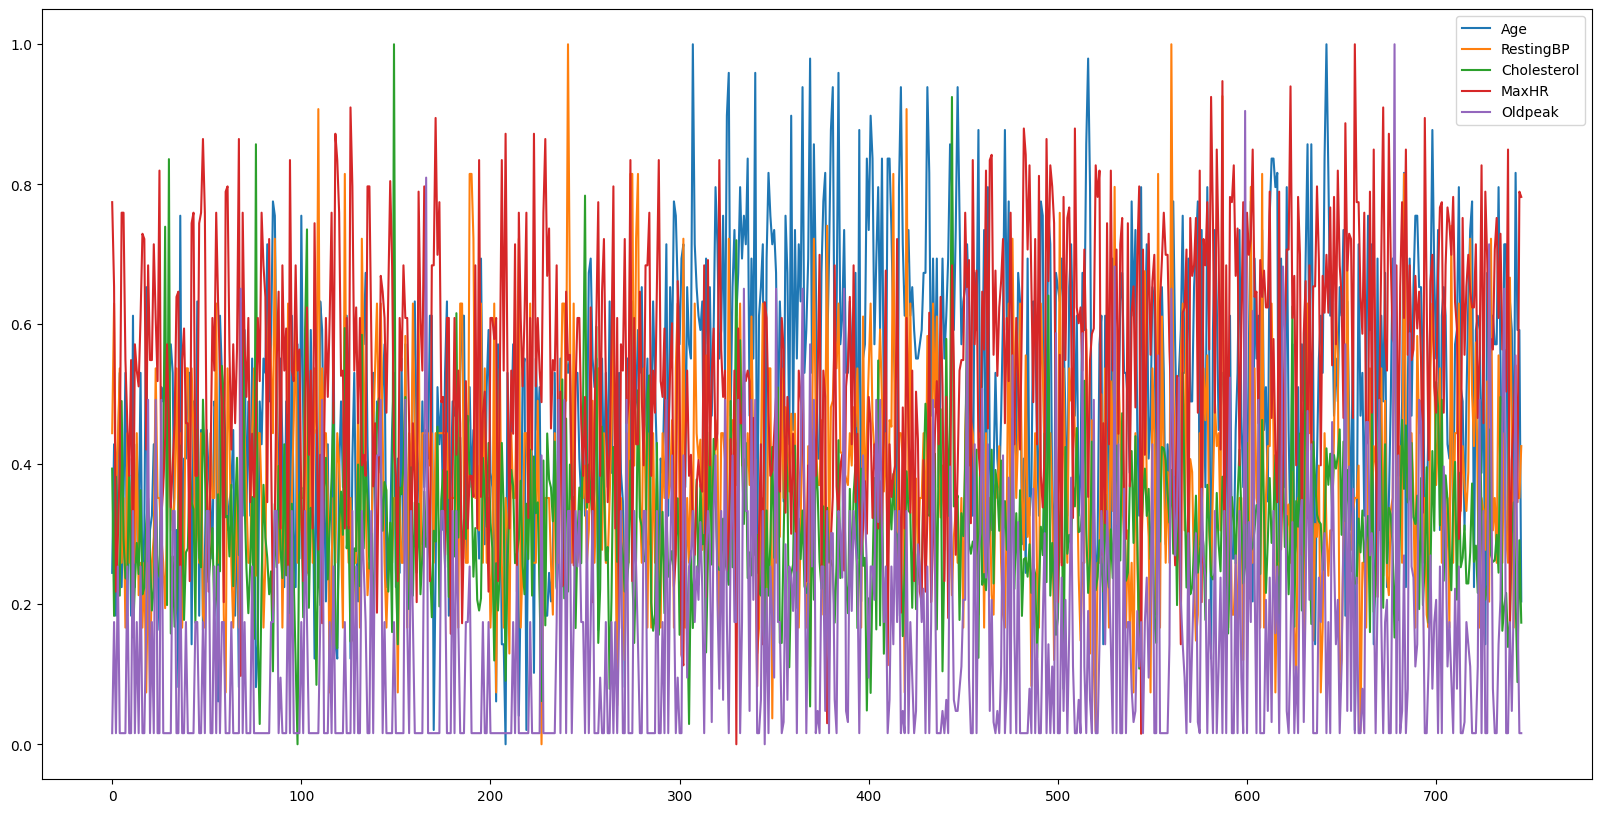

In [13]:
#Vērtību vizualizācijai tiek atlasīti tikai atribūti ar skaitliskām vērtībām nepārtrauktajā skalā
darba_datu_kopa_vizualizacijai = darba_datu_kopa[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]
#darba_datu_kopa_vizualizacijai = datu_kopa[["RestingBP", "MaxHR"]]
#darba_datu_kopa_vizualizacijai.sort_values(by='RestingBP').plot(figsize=(20,10), y='MaxHR', x='RestingBP', kind='scatter')
#Vērtību attēlojuma izvade
# print(datu_kopa[["MaxHR", "RestingBP"]].sort_values(by='RestingBP'))
darba_datu_kopa_vizualizacijai.plot(figsize=(20,10))
# darba_datu_kopa_vizualizacijai.plot(x='Age', y='Cholesterol', kind='line', color="purple")

Vērtību attēlojums ļauj veikt šādus secinājumus:
- kad kulmena dziļums ir lielāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa samazinās (vērtības ir <0.4)
- kad kulmena dziļums ir ap 0.5, tad arī kulmena garums, pleznas garums un ķermeņa masa ir ap to pašu vērtību (viss saplūst kopā)
- kad kulmena dziļums ir mazāks par 0.4, tad kulmena garums, pleznas garums un ķermeņa masa pieaug (vērtības ir >0.4)
- vispārīgi kulmena garums, pleznas garums un ķermeņa masa mainās kopā un, iespējams, tieši šie atribūti ļaus vislabāk atdalīt klases tālākajā klasifikācijas uzdevumā

### Histogrammu analīze

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'Sex_cat'}>,
        <Axes: title={'center': 'ChestPainType_cat'}>],
       [<Axes: title={'center': 'RestingECG_cat'}>,
        <Axes: title={'center': 'ExerciseAngina_cat'}>,
        <Axes: title={'center': 'ST_Slope_cat'}>]], dtype=object)

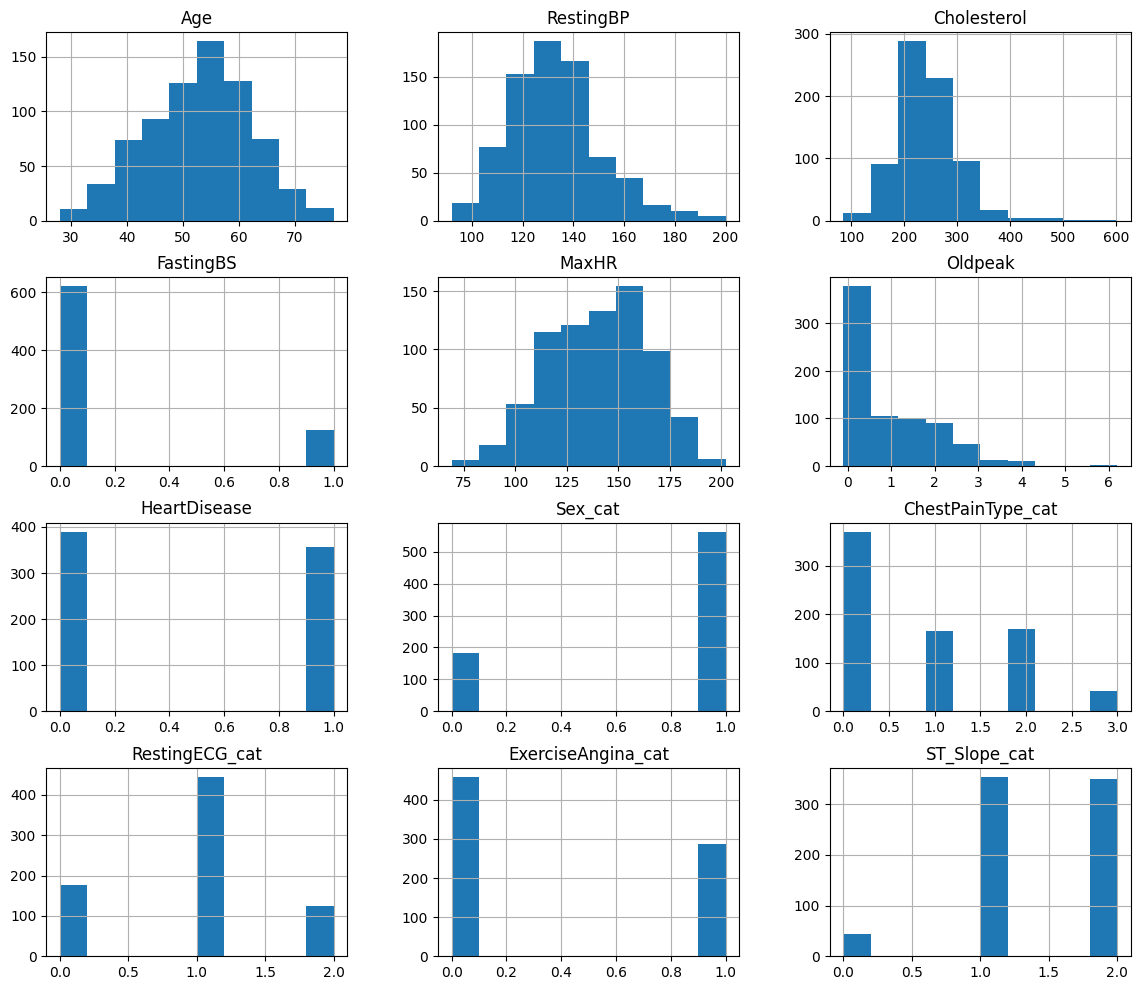

In [14]:
#Datu kopas atribūtu histogrammu izvade
#print(datu_kopa)
datu_kopa.hist(figsize=(14,12))

Histogrammās redzam, ka viena no pingvīnu sugām ir mazāk pārstāvēta. Tas nozīmē, ka datu kopā pieejamās klases nav sabalansētas. Tas pats ir novērojams saistībā ar salām, no kurām pingvīni nāk: viena no tām ir mazāk pārstāvēta.
Pie tam datu kopā ir vairāk pingvīnu ar mazāku ķermeņa masu un vairāk pingvīnu ar garāko kulmenu un vairāk pingvīnu ar mazāko pleznas garumu.

### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)


Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

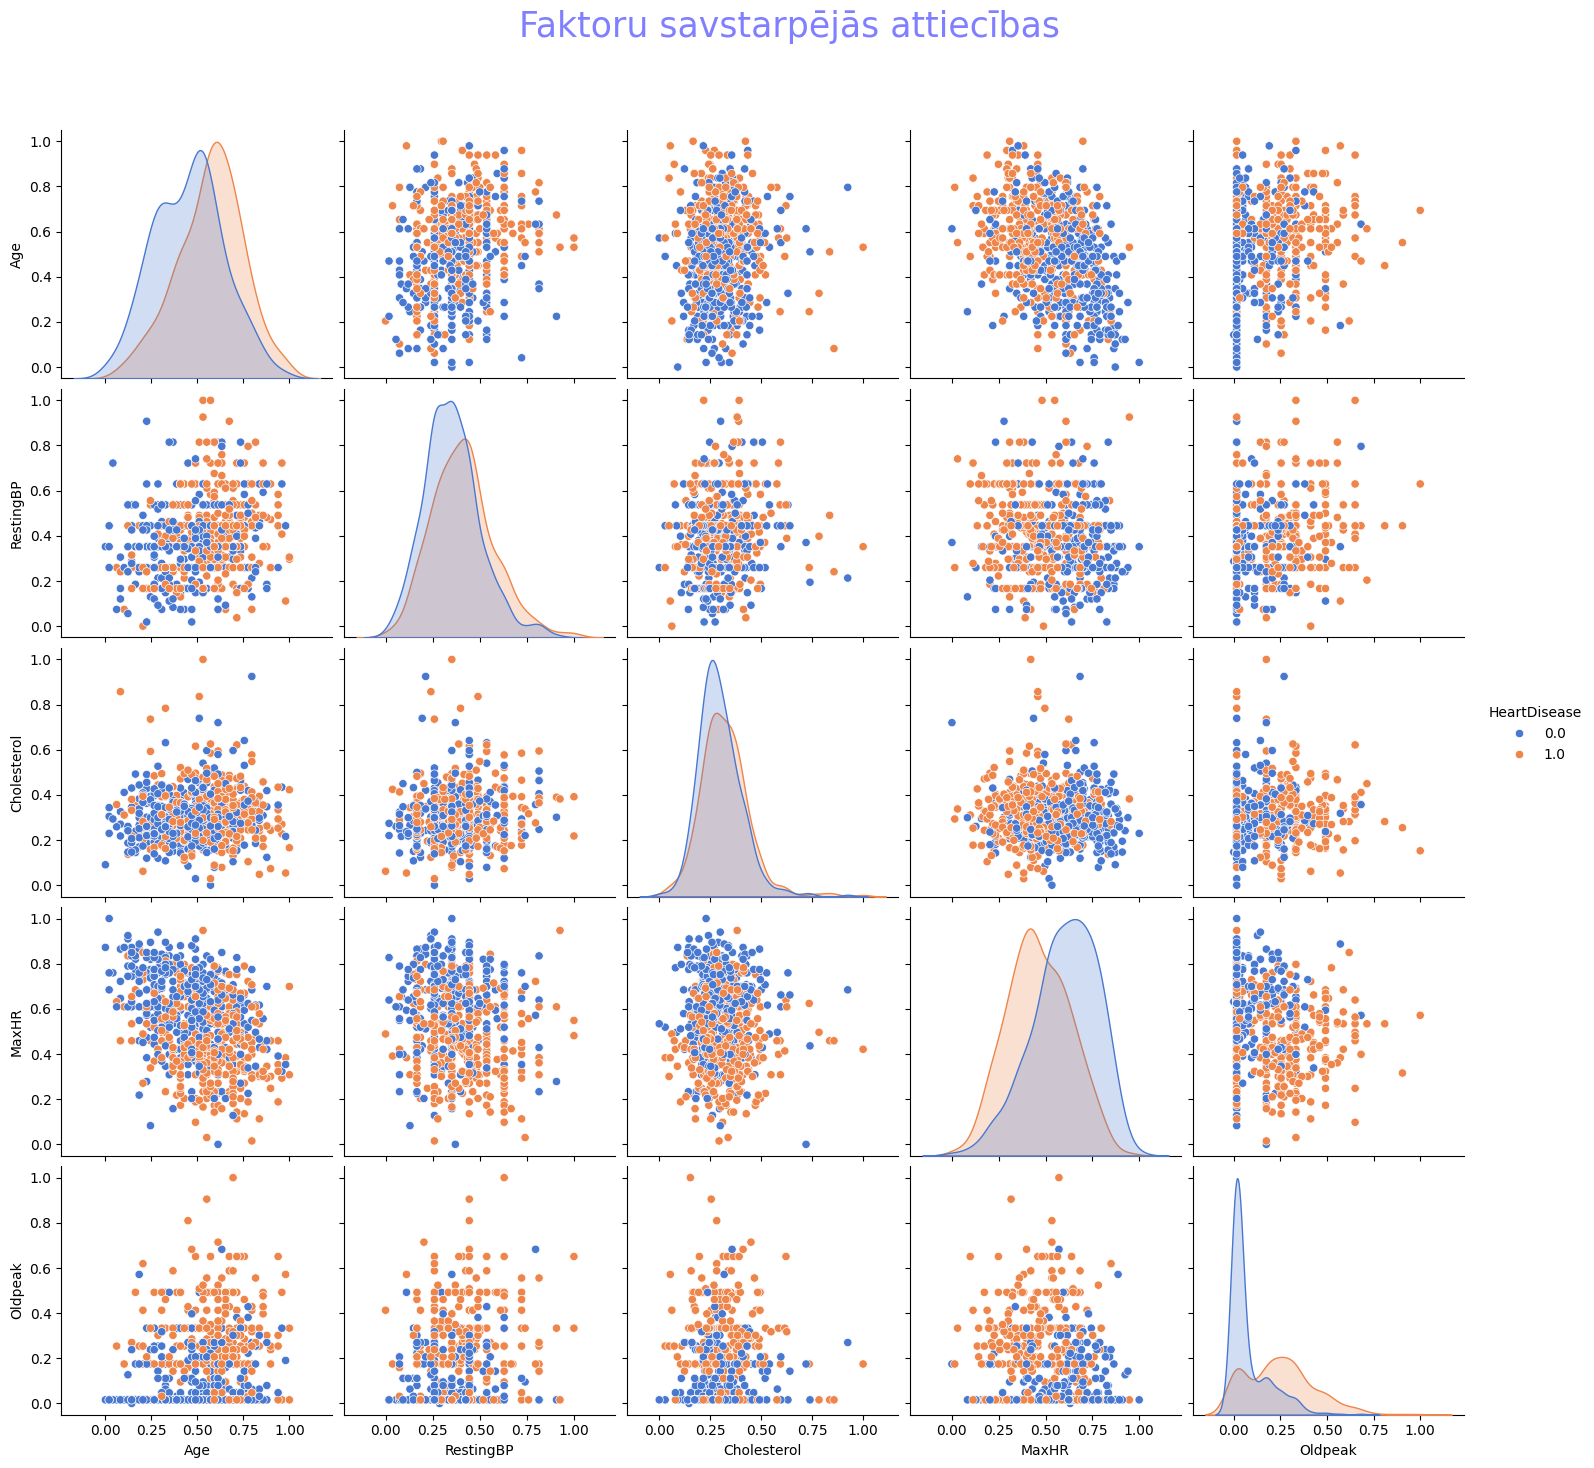

In [15]:
#Izveidojam atribūtu pāru grafiku, norādot tā kopējo izmēru  un krāsu shēmu "Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='HeartDisease',palette="muted",height=3,vars=['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

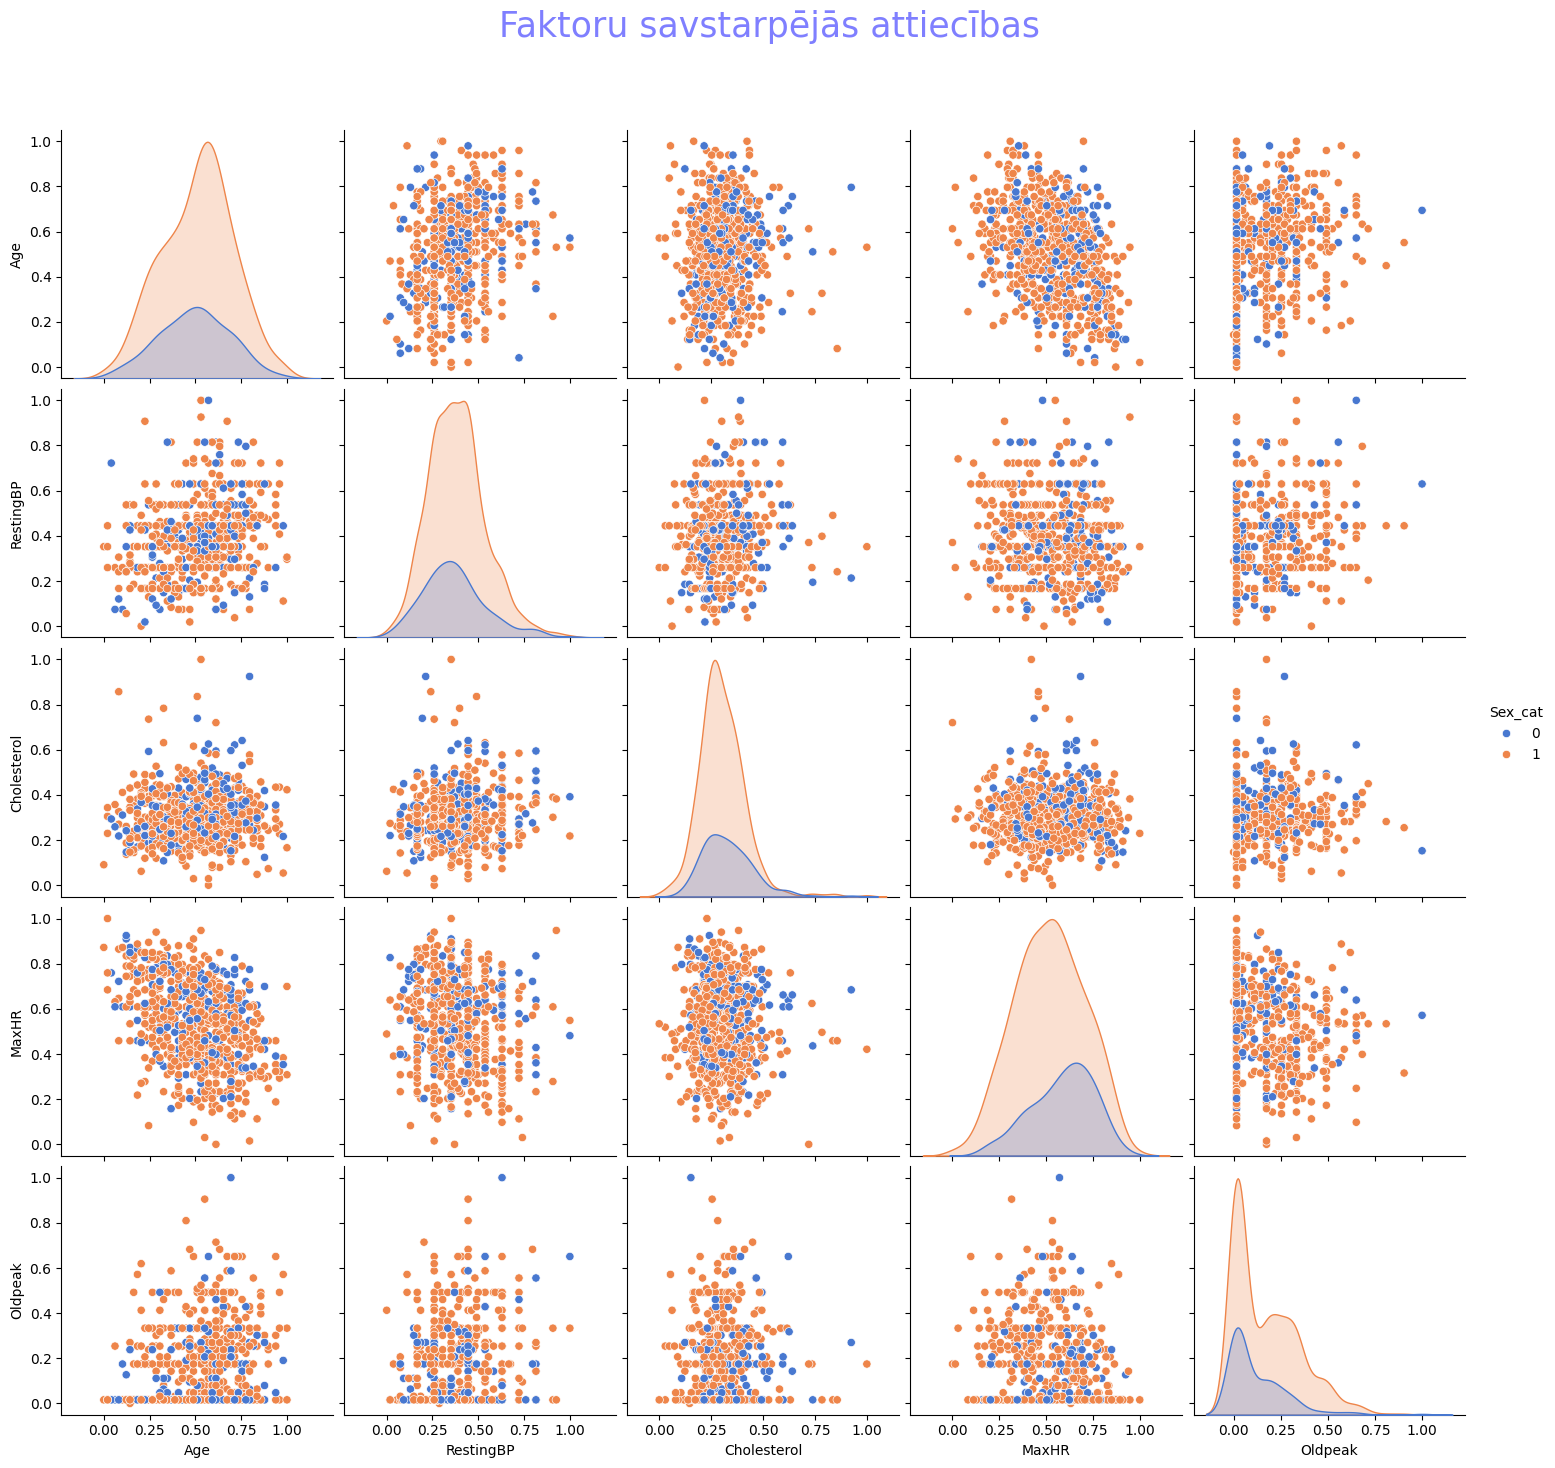

In [16]:
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='Sex_cat',palette="muted",height=3,vars=['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

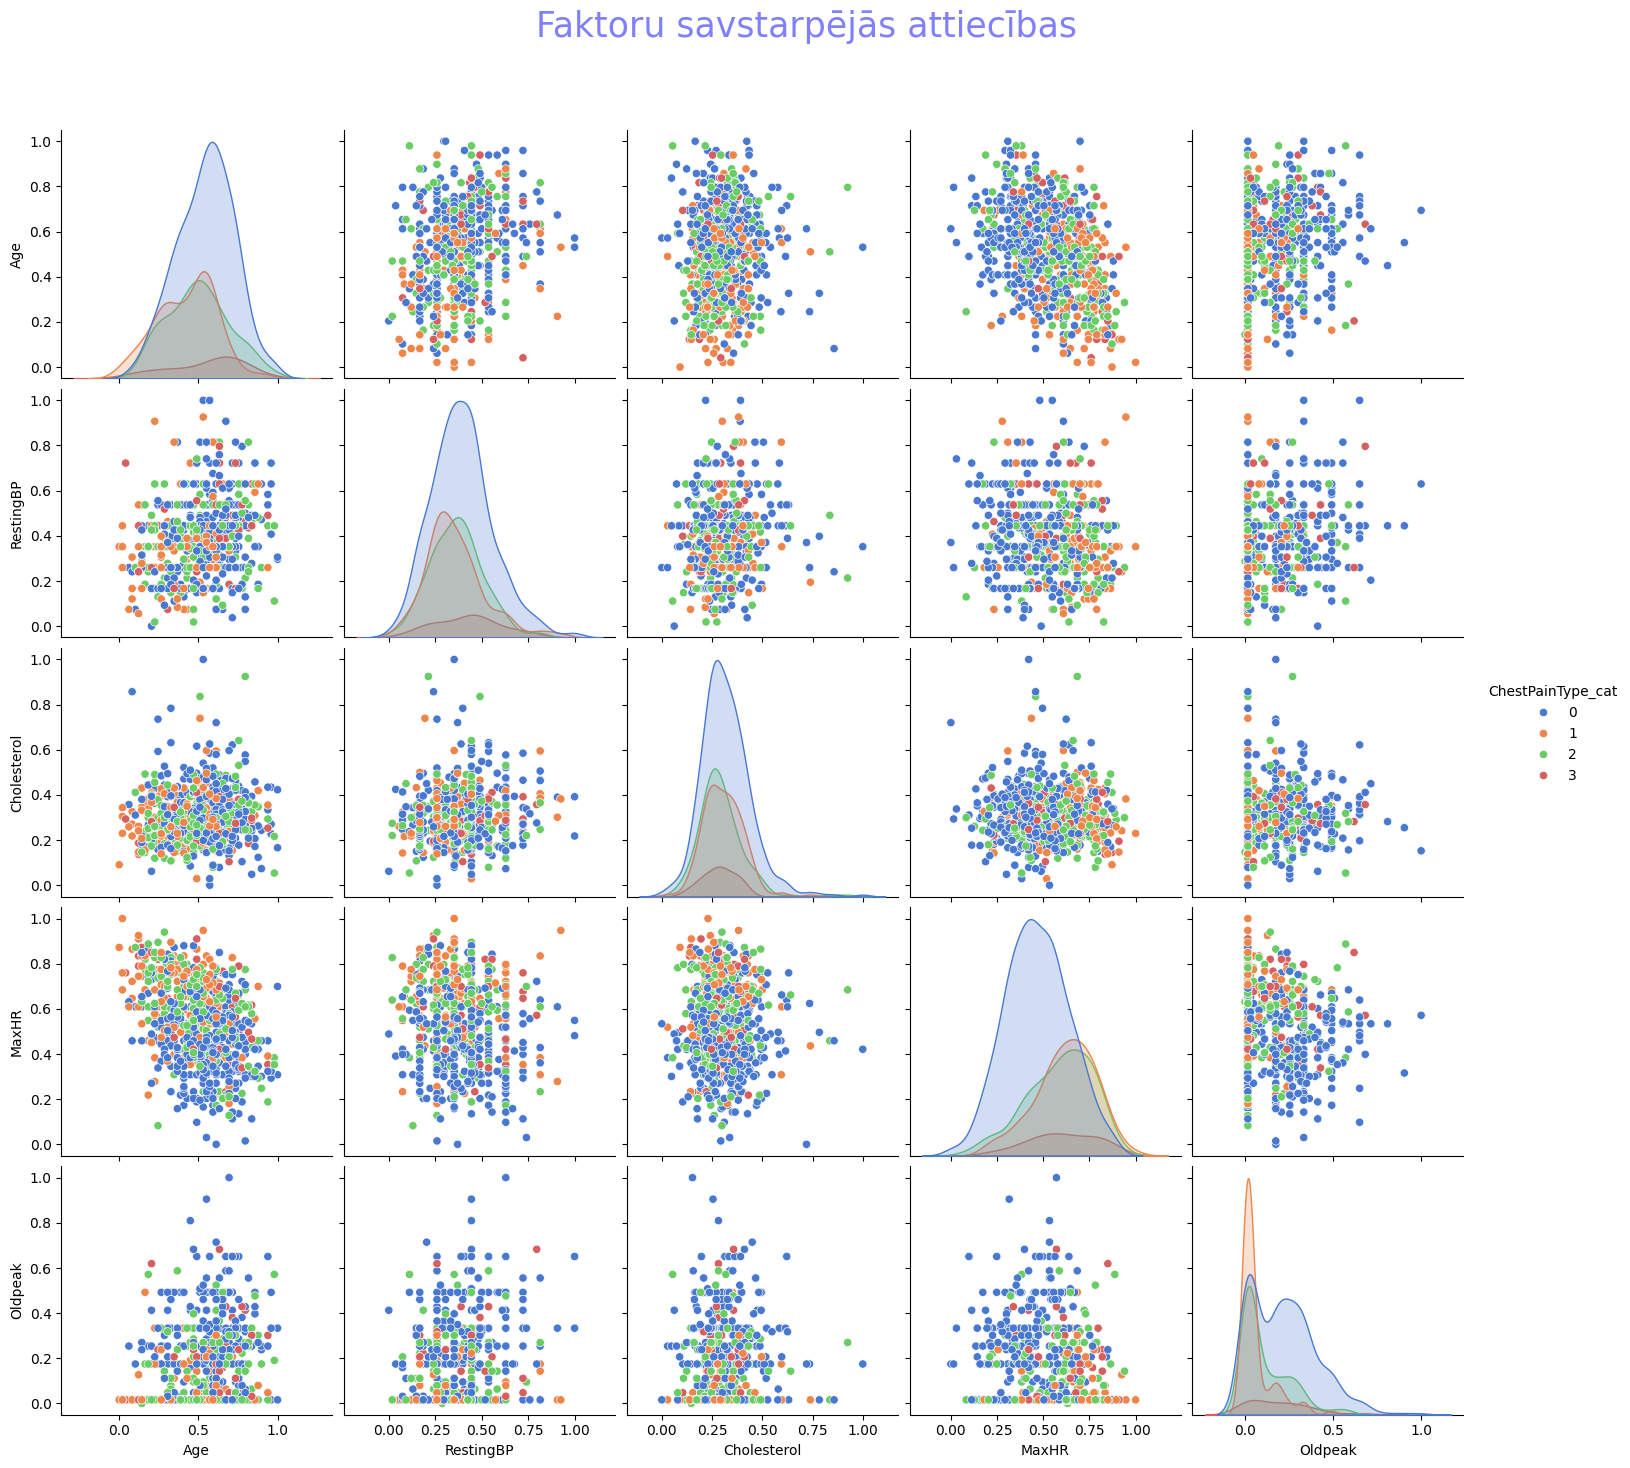

In [17]:
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='ChestPainType_cat',palette="muted",height=3,vars=['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

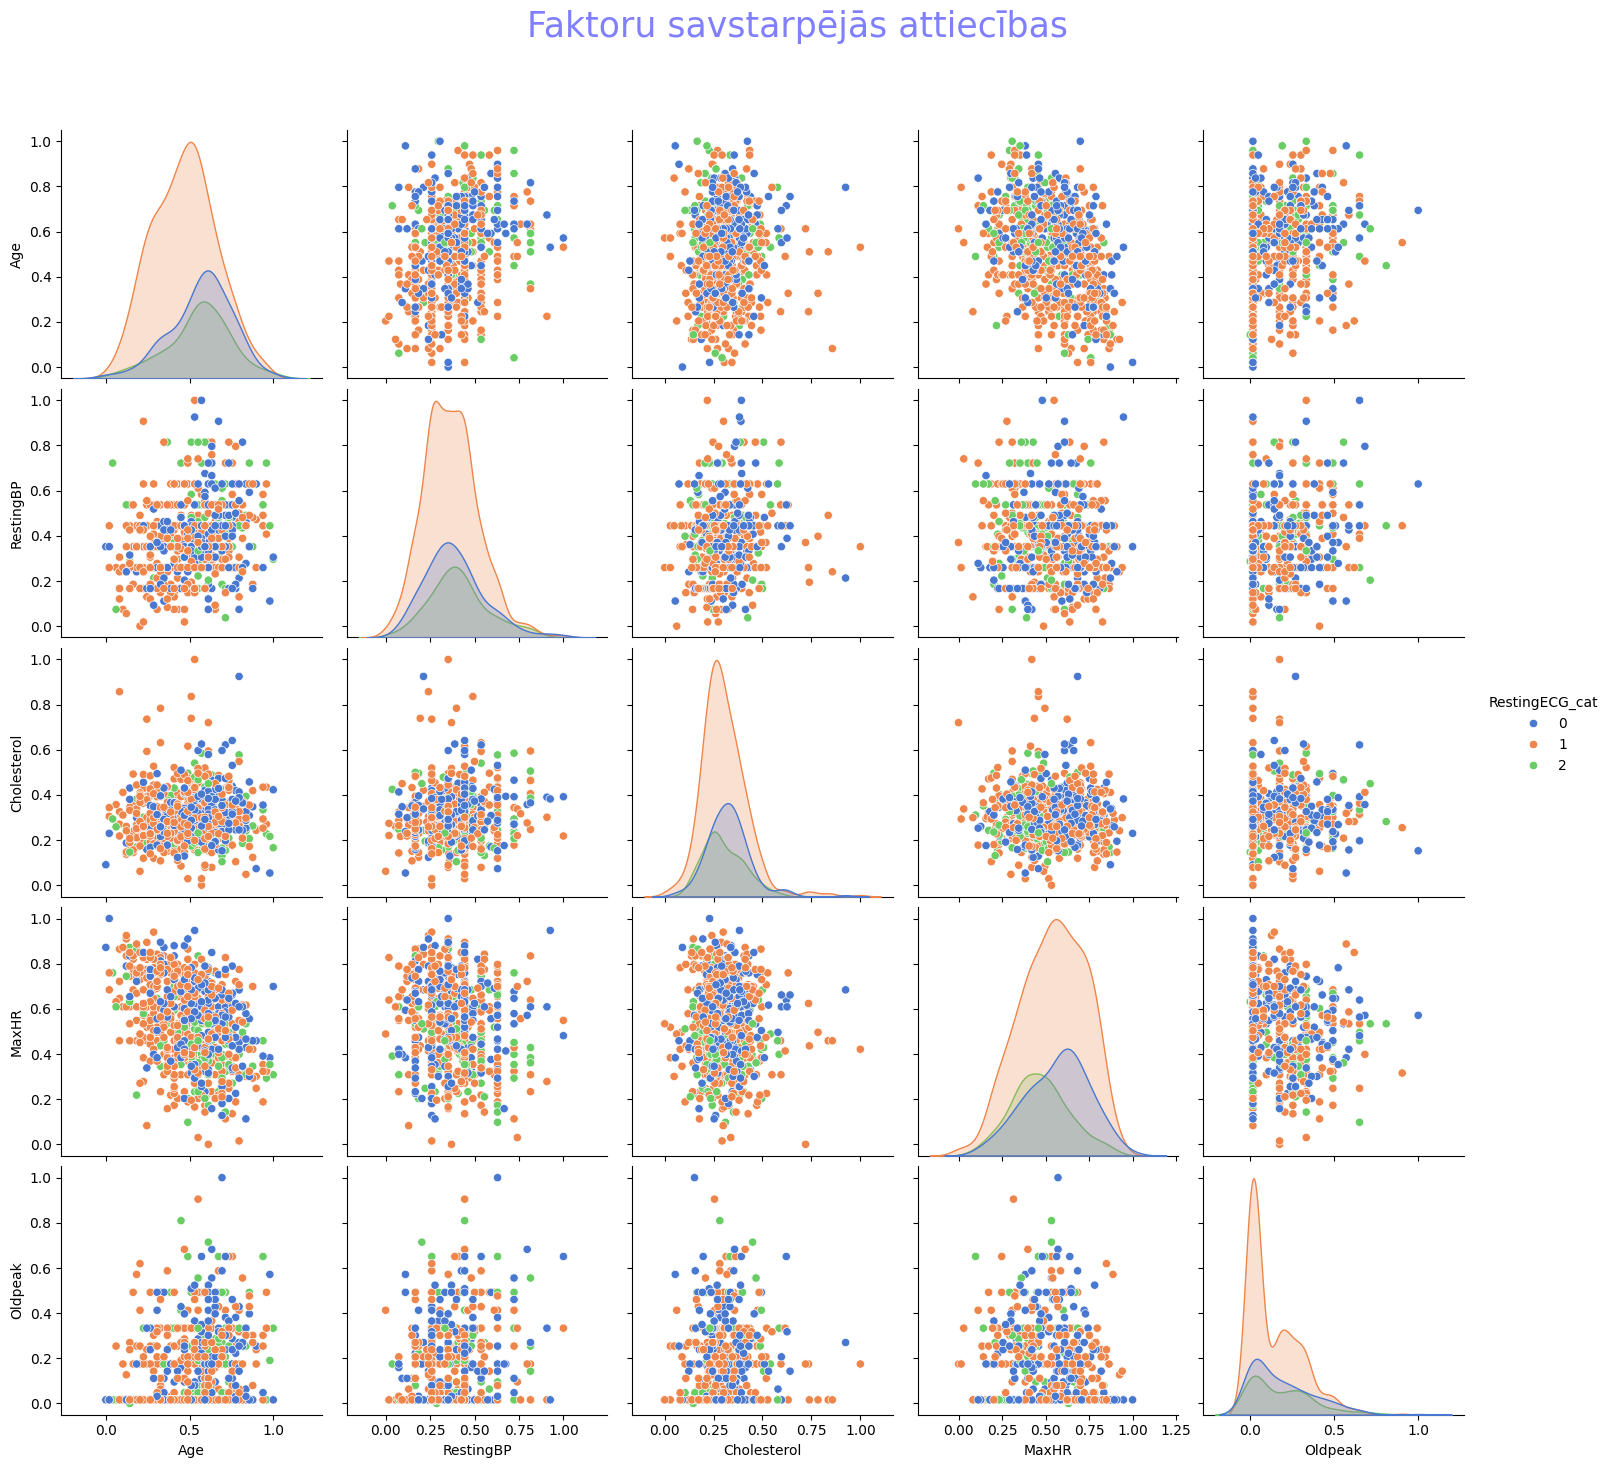

In [18]:
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='RestingECG_cat',palette="muted",height=3,vars=['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

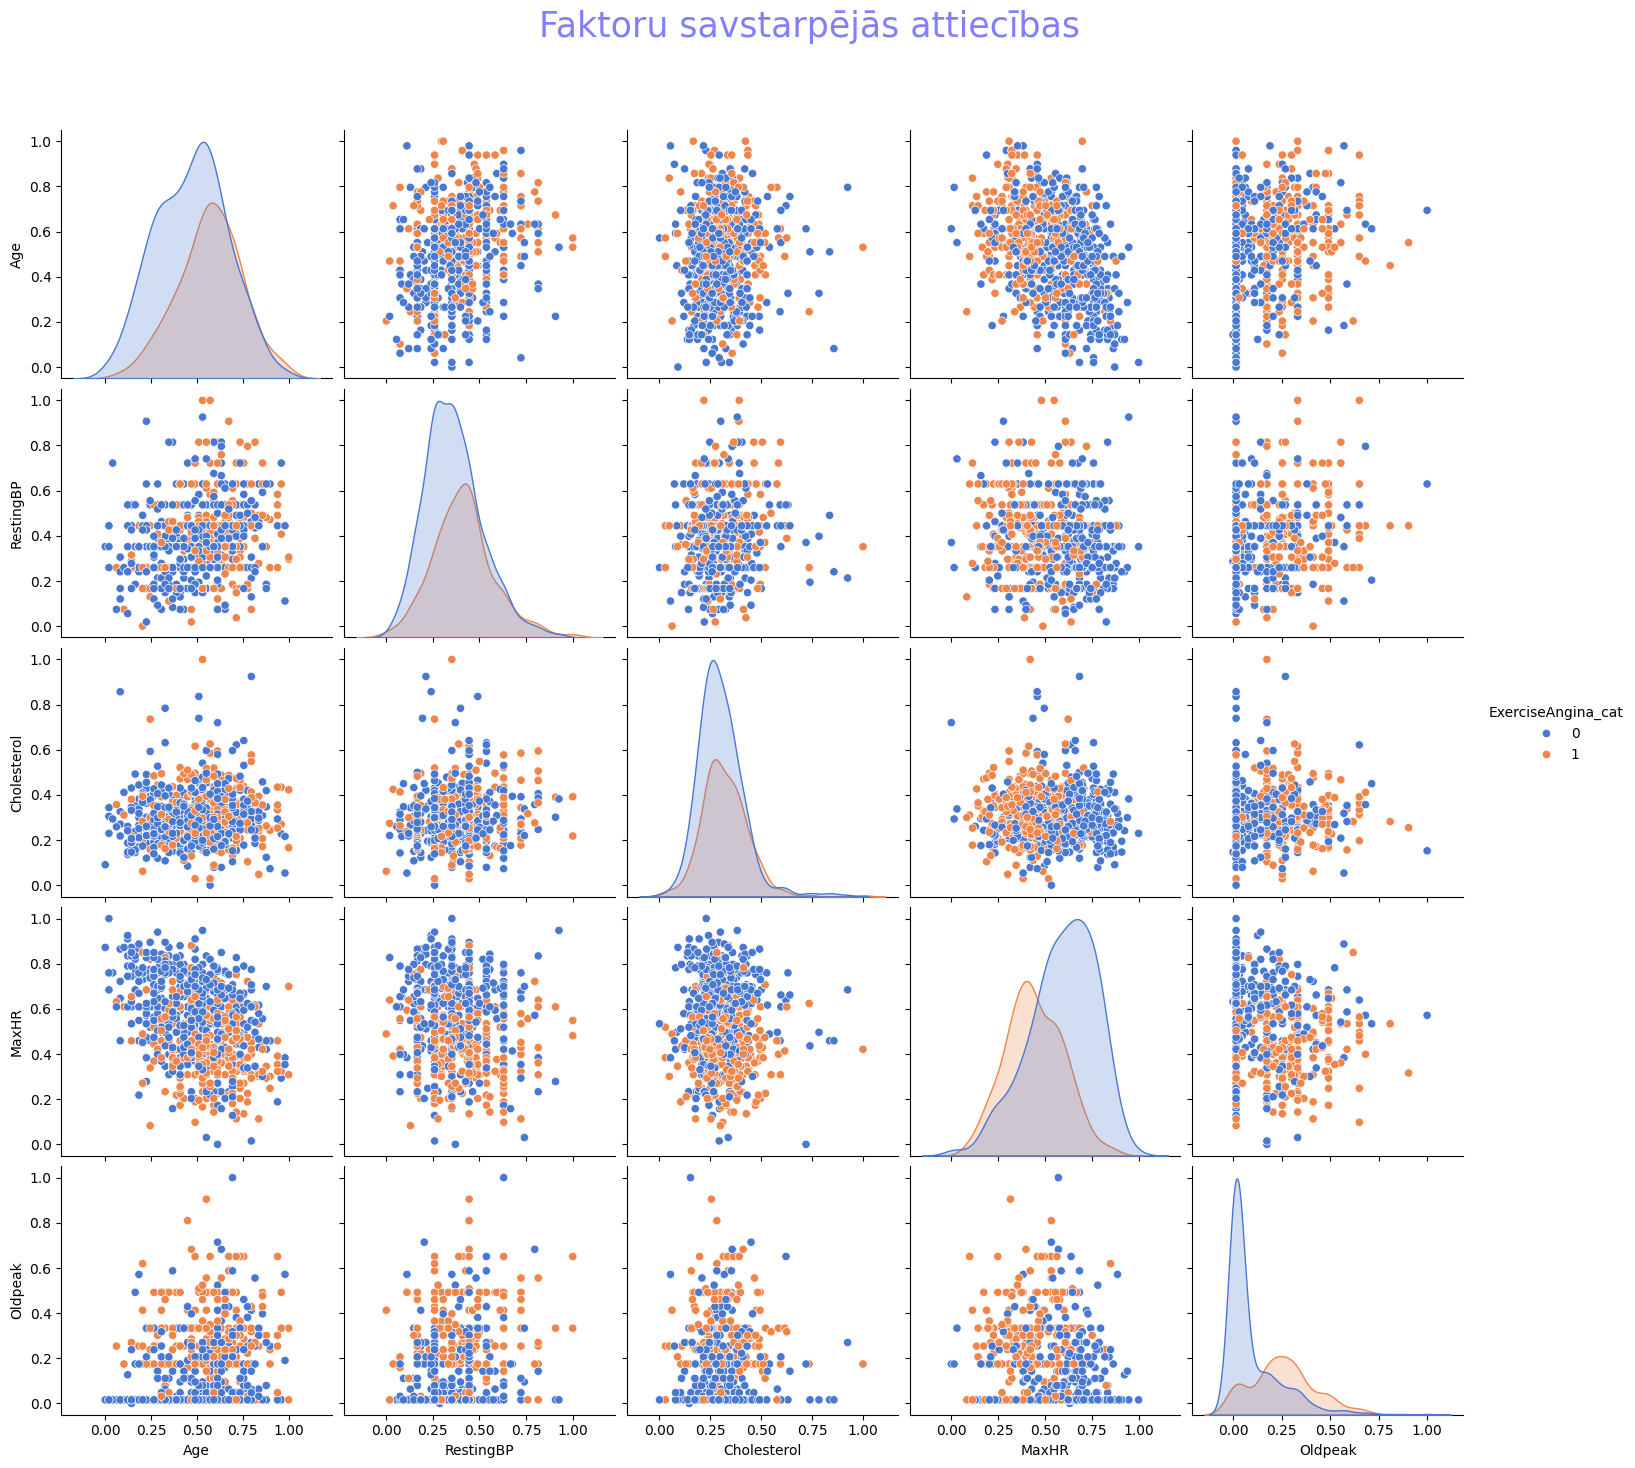

In [19]:
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='ExerciseAngina_cat',palette="muted",height=3,vars=['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

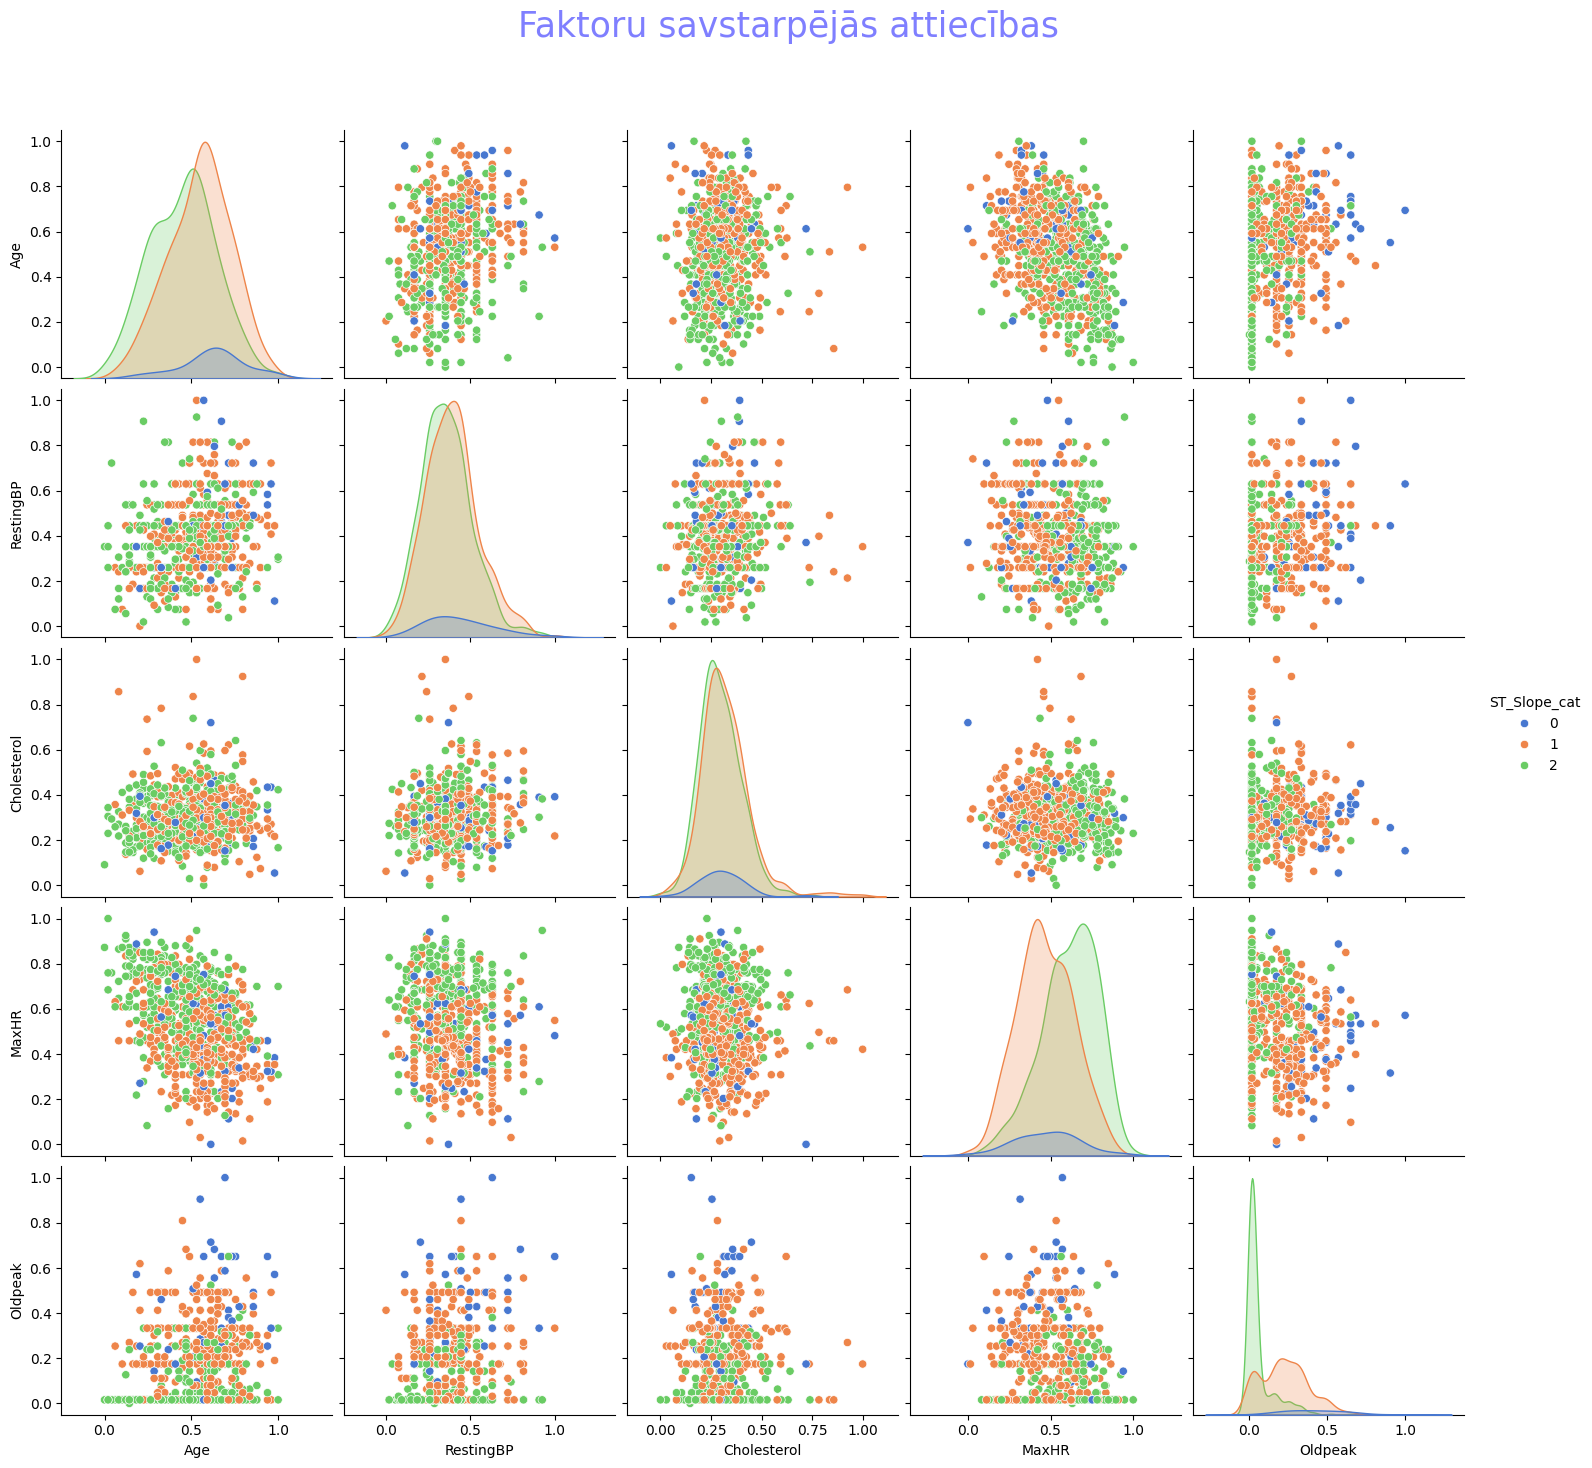

In [20]:
paru_grafiks = sns.pairplot(darba_datu_kopa,hue='ST_Slope_cat',palette="muted",height=3,vars=['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak'],kind='scatter')
# Papildus atstarpe, lai virsraksts tiktu attēlots pareizi
plt.subplots_adjust(top=0.9)
#Norādām virsrakstu grafikam
paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības',fontsize=25,color='b',alpha=0.5)

Faktoru sadalījumi tiek pētīti, par pamatu izmantojot pingvīnu sugas. Grafiki ļauj secināt, ka šādi atribūtu pāri nodrošina pietiekami labu klašu atdalamību:
*	"culmen_length_mm" un "culmen_depth_mm" 
*	"culmen_length_mm" un "flipper_lenght_mm”
un tos var izmantot klasifikācijas uzdevumā.

Savukārt šādi atribūtu pāri nenodrošina labu klašu atdalamību:
*	"culmen_length_mm" un "body_mass_g": zilie datu objekti daļēji saplūst ar zaļajiem datu objektiem un labi atdalāmi ir tikai oranžie datu objekti
*	"culmen_depth_mm" un "flipper_length_mm": zilie datu objekti saplūst ar oranžajiem, tikai zaļie datu objekti ir labi atdalāmi
*	"culmen_depth_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi
*	"flipper_length_mm" un "body_mass_g": zilie datu objekti saplūst ar oranžajiem datu objektiem un tikai zaļie datu objekti ir labi atdalāmi 

### Atribūtu savstarpējā korelācija

<Axes: >

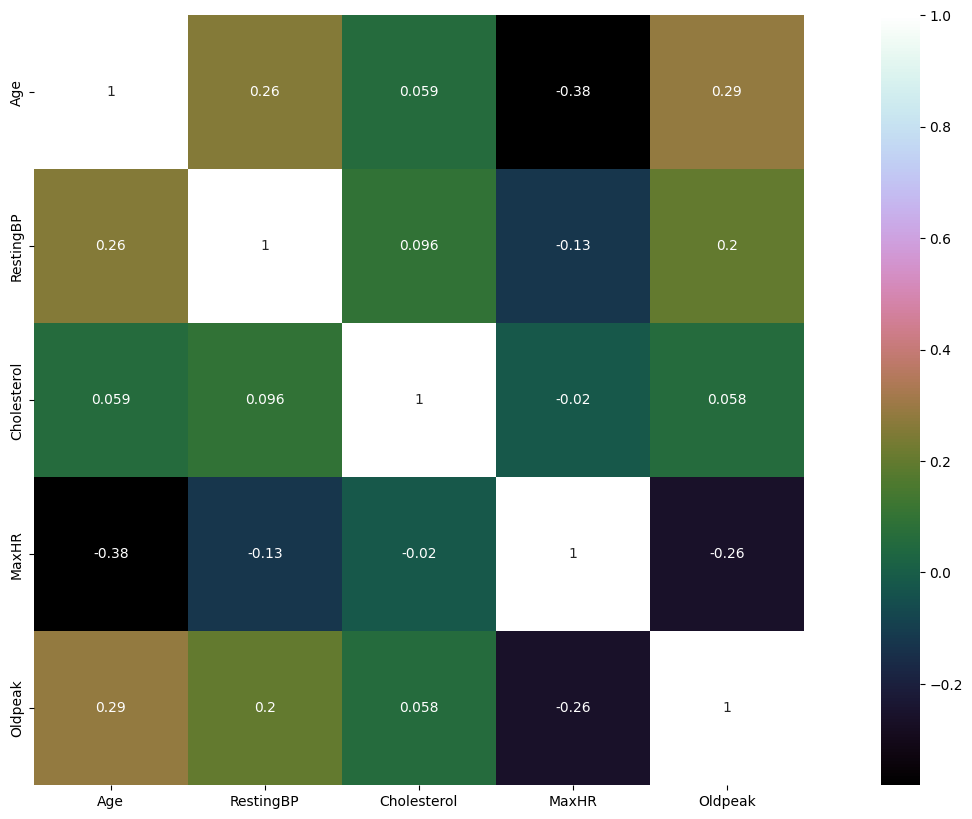

In [21]:
#Tiek izveidota korelācijas matrica, tajā atspoguļojot korelācijas koeficientu skaitliskiem atribūtiem
korelacijas_matrica=darba_datu_kopa_vizualizacijai.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(korelacijas_matrica,vmax=1,square=True,annot=True,cmap='cubehelix')

Korelācijas matricas analīze ļauj secināt, ka:
* starp atribūtiem “culmen_length_mm” un “culmen_depth_mm” ir vāja negatīva korelācija
* atribūtam “culmen_length_mm” ir vidējā pozitīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* atribūtam “culmen_depth_mm” ir vidējā negatīvā korelācija ar atribūtiem “flipper_length_mm” un “body_mass_g”
* starp atribūtiem “flipper_length_mm” un “body_mass_g” ir augsta pozitīva korelācija

Tādējādi saistībā ar pēdējiem diviem atribūtiem var paredzēt multikolinearitātes problēmu, kas var apgrūtināt atsevišķu mašīnmācīšanās rezultātu interpretāciju, līdz ar to tālākajā analīzē nebūtu vēlams abus šos atribūtus iekļaut.